In [2]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
utils = reload(utils)
pt = reload(pt)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

In [33]:
Nx, Ny, Nz = 64, 1, 64
Nx, Ny = 64, 64
# Nx, Ny = 100, 50
et = 10.0
et = 1.0

def load(Nx,Ny,et):
    base_fn = 'output_swe_vortex'
#     base_fn = 'output_rising_bubble'
    base_fn = 'output_travelling_vortex'
    pydir = '../%s/' %base_fn

#     tc = utils.test_case(base_fn, pydir, Nx, Ny, et, Nz=Nz)
    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags
tc, tags = load(Nx,Ny,et)

In [34]:
N = 10
# sfx0 = 'debug_daext'
sfx0 = 'wdawloc_1.0_rhou_rhow_p0.2_tra_corr_2pi'
sfx0 = 'wdawloc_pp_rhou_rhow_tra'
sfx0 = 'wdawloc_pp_rhou_rhov_tra_0.25_nonorm'
# sfx0 = 'obs_dpib_wdawloc_1.0_rho_rhov_11by11_nonorm_test'
sfx0 = tc.cb_suffix(1,0, '%s' %(sfx0))
# sfx = sfx0

fn_pickle = tc.get_filename(N,sfx0,format='dat')
path_pickle = tc.get_path(fn_pickle)

i2 = (slice(2,-2),slice(2,-2))

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
node = pickle.load(file)
obs = pickle.load(file)
obs_noisy = pickle.load(file)
obs_noisy_interp = pickle.load(file)
obs_mask = pickle.load(file)
obs_covar = pickle.load(file)
file.close()

In [36]:
attr = 'p2_nodes'

print(obs[0][attr].shape)
print(obs_noisy[0][attr].shape)
print(obs_noisy_interp[0][attr].shape)
print(obs_mask[0][attr].sum())
print(obs_covar[1].shape)

time_len = len(obs)
print(time_len)

(69, 69)
(69, 69)
(69, 69)
2113.0
(12, 1)
12


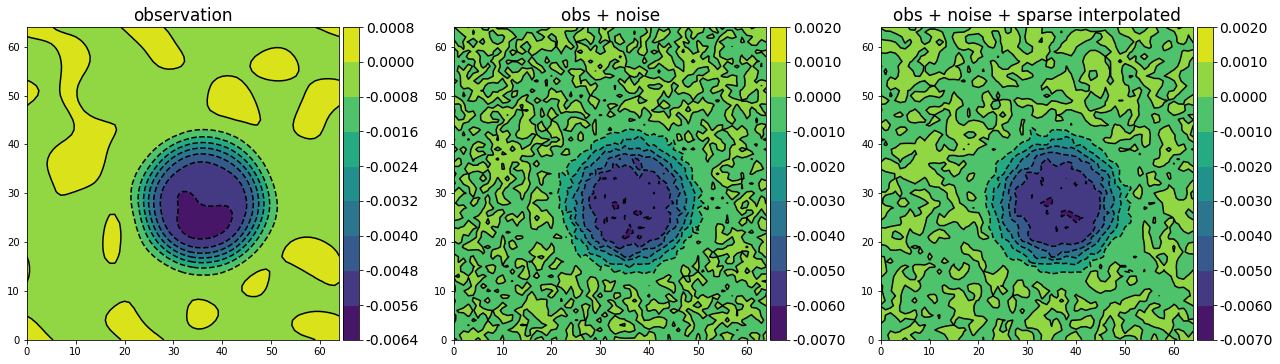

In [37]:
time_index = 3
attribute = attr
obs_arr = obs[time_index][attribute][i2].T
obs_arr = [obs_arr, 'observation']
obs_n_arr = obs_noisy[time_index][attribute][i2].T
obs_n_arr = [obs_n_arr, 'obs + noise']
obs_ni_arr = obs_noisy_interp[time_index][attribute][i2].T
obs_ni_arr = [obs_ni_arr, 'obs + noise + sparse interpolated']
obs_mask_arr = obs_mask[time_index][attribute]
# obs_mask_arr = [obs_mask_arr, 'obs_mask']

arr_lst = [obs_arr, obs_n_arr, obs_ni_arr]

ncolslen = 3
fs = (18,12)
pl = pt.plotter(arr_lst,ncols=ncolslen,figsize=fs,sharey=False)
_ = pl.plot(aspect='equal',method='contour')
pl.save_fig('obs_noise_sparse_interpolated')

fraction of non-zero entries: 0.5001183431952663


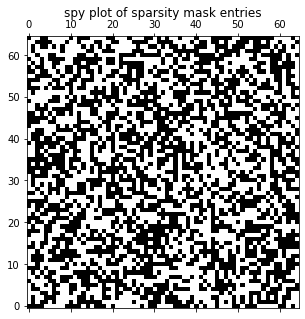

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

i2 = (slice(2,-2),slice(2,-2))

fig = plt.figure(figsize=(6,5))
plt.spy(obs_mask_arr[i2].T, origin='lower')
obs_mask_arr_shp = obs_mask_arr[i2].shape[0] * obs_mask_arr[i2].shape[1]
print("fraction of non-zero entries:", obs_mask_arr[i2].sum() / obs_mask_arr_shp)
plt.title("spy plot of sparsity mask entries")
plt.savefig("spy_mask.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [39]:
print(obs_covar)

[array([], shape=(12, 0), dtype=float64), array([[8.69859429e-08],
       [8.44961492e-08],
       [9.26480142e-08],
       [8.91049414e-08],
       [8.99214104e-08],
       [9.28799301e-08],
       [9.20550105e-08],
       [9.28139651e-08],
       [9.18994234e-08],
       [9.37694214e-08],
       [9.09232771e-08],
       [8.88672538e-08]])]
